In [1]:
import sys
 
# setting path
sys.path.append('../')

import pydicom

from utils.display import display_dicom

In [2]:
sample_dcm_path = "/home/r079a/Desktop/de-identification/dataset/midi-test-data/input_data/6505936988/3.2.507.1.0.8115330.1.172.7621284414889723933/3.2.507.1.0.8115330.1.172.7007111909678456590/00000277.dcm"

In [3]:
ds = pydicom.dcmread(sample_dcm_path)

In [4]:
ds

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 176
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 3.2.507.1.0.8115330.1.172.2149465667987939551
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.35'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'OTHER']
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 3.2.507.1.0.8115330.1.172.2149465667987939551
(0008, 0020) Study Date                          DA: '20181228'
(000

In [5]:
# for element in ds.elements():
#     if element.VR == 'OW':
#         print(element.tag, element.name)
#         # print(element.value)

In [6]:
print(ds.pixel_array.shape)

(256, 256)


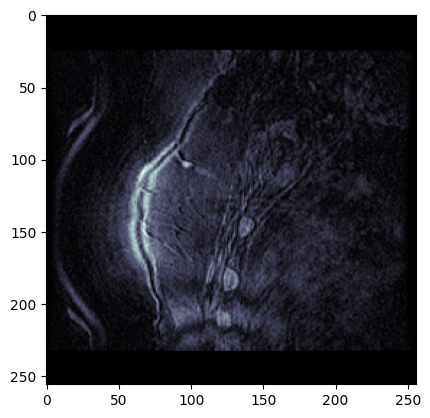

In [7]:
display_dicom(ds)

In [8]:
from dcm_anonymizers.phi_detectors import DcmRobustPHIDetector
from dcm_anonymizers.img_anonymizers import DCMImageAnonymizer
from dcm_anonymizers.tcia_deid import DCMTCIAAnonymizer
from dcm_anonymizers.private_tags_extractor import PrivateTagsExtractorV2

In [9]:
phi_detector = DcmRobustPHIDetector(logging=False)
# img_anonymizer = DCMImageAnonymizer(phi_detector=phi_detector)

ptags_extr = PrivateTagsExtractorV2(private_tags_dict_path='../dcm_anonymizers/tcia_private_tags_dict.json')
anonymizer = DCMTCIAAnonymizer(
    phi_detector=None,
    notes_phi_detector=phi_detector,
    soft_detection=True,
    private_tags_extractor=ptags_extr,
    rules_json_path='../dcm_anonymizers/tcia_deid_attrs.json'
)

[2024-09-05 17:44:20,215] [   DEBUG] ps_3_3.py:97 - PS3.3 init
[2024-09-05 17:44:20,216] [   DEBUG] tcia_deid.py:67 - TCIA anonymizer init


In [10]:
# changed = img_anonymizer.anonymize_dicom_image_data(ds)
# print(changed)

In [11]:
# display_dicom(ds)

In [12]:
anonymizer.anonymize_dataset(ds)

In [13]:
ds

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 176
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.8.498.10205162346762603191216276292598317874
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.35'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'OTHER']
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.826.0.1.3680043.8.498.10205162346762603191216276292598317874
(0008, 0020) Study Date       

In [8]:
import pandas as pd
from pathlib import Path

In [14]:
output_mapping_path = "/home/r079a/Desktop/de-identification/dataset/midi-test-data/output_data_sample/mappings"

detected_entitis_csv = Path(output_mapping_path, "detected_entities.csv")

In [15]:
detected_entities_df = pd.read_csv(detected_entitis_csv)

In [16]:
detected_entities_df = detected_entities_df.sort_values(by=['count'], ascending=False)

In [17]:
pd.set_option('display.max_rows', 100)

In [20]:
detected_entities_df[100:200]

,entitity,count
947,Jackson,477
913,Cheyenne Jennings,467
602,WH,466
915,Simpson,464
1658,Mark Wilcox,463
635,542-18-2994,458
580,3816978523,458
52,Smith,458
919,Smith Community Hospital,454
918,"James, Cortez",453


In [41]:
[',', '-', '(', ')', 'Price', 'Short', 'Glass', 'BrzuchMiednica', 'H20', 'Day', 'JPEGLOSSLESSPROCFIRSTORDERREDICT', 'KIDNEY_MASS_HEMATURIA_BMI_under30', 'THINS']
['RESSONANCIA', 'MAGNETICA', 'PELVE', 'LUNG', 'CHEST', 'ABDOMEN', 'miednicy']

['RESSONANCIA', 'MAGNETICA', 'PELVE', 'LUNG', 'CHEST']